In [1]:
import subprocess
import random

size_db=[400,800,1600,3200,6400,12800,25600,51200,102400,204800]

In [2]:
def generate_database(i,q,c,t):
    j=i+1000
    nbr=0
    db=""
    while(nbr<t):
        if(q==0):
            db=db+f'p({j},{(j+((j+1)%2))},{(j+(j%2))*2}). s({j+((j+1)%2)},0). r({(j+(j%2))*2},{j+3},c). '
        else:
            db=db+f'p({j},{j},{j},{j}).'
        j=j+1
        nbr=nbr+1
    if(not c):
        tmp=random.randint(1,3)
        if(q==0):
            if(tmp==1):
                db=db+f'p({j},{(j*1000)},{(j+(j%2))*2}).'
            elif(tmp==2):
                db=db+f'p({j},{(j+((j+1)%2))},{(j*1000)}).'
            elif(tmp==3):
                db=db+f'r({(j+(j%2))*2},{j+3},d). '
        else:
                db=db+f'p({j},{j},{j},{j+10000}). p({j},{j},{j},{j}).'
            
    return db

In [3]:
f = open("q0.db", "w")

i=0
q0_datalog=[]
q0_gac=[]
while(i<10):
    line=generate_database(i,0,True,size_db[i])
    f.write(line)
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q0.db',"datalog_query0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if("unsatisfied" in tmp[0]):
            print("Unsatisfied detected")
            break

        result = subprocess.run(['clingo','q0.db',"gac_query0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])
        if("UNSATISFIABLE" in tmp[0]):
            print("Unsatisfied detected")
            break
        j=j+1
    q0_datalog.append(list_d)
    q0_gac.append(list_gac)
        
        
    i=i+1


f.close()

In [4]:
f = open("q0_inconsistent.db", "w")

i=0
q0c_datalog=[]
q0c_gac=[]
while(i<10):
    line=generate_database(i,0,False,size_db[i])
    f.write(line)
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q0_inconsistent.db',"datalog_query0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if(not "unsatisfied" in tmp[0]):
            print("Unsatisfied detected")
            break

        result = subprocess.run(['clingo','q0_inconsistent.db',"gac_query0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])

        if(not "UNSATISFIABLE" in tmp[0]):
            print("Unsatisfied detected")
            break
        j=j+1
    q0c_datalog.append(list_d)
    q0c_gac.append(list_gac)
    
    i=i+1


f.close()

In [5]:
f = open("q1.db", "w")

i=0
q1_datalog=[]
q1_gac=[]
while(i<10):
    line=generate_database(i,1,True,size_db[i])
    f.write(line)
    
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q1.db',"datalog_query1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if("unsatisfied" in tmp[0]):
            print("Unsatisfied detected")
            break

        result = subprocess.run(['clingo','q1.db',"gac_query1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])
        if("UNSATISFIABLE" in tmp[0]):
            print("Unsatisfied detected")
            break
        j=j+1
        
    q1_datalog.append(list_d)
    q1_gac.append(list_gac)
        
    i=i+1


f.close()

In [6]:
f = open("q1_inconsistent.db", "w")

i=0
q1c_datalog=[]
q1c_gac=[]
while(i<10):
    line=generate_database(i,1,False,size_db[i])
    f.write(line)
    
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q1_inconsistent.db',"datalog_query1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if(not "unsatisfied" in tmp[0]):
            print("satisfied detected")
            break

        result = subprocess.run(['clingo','q1_inconsistent.db',"gac_query1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])

        if(not "UNSATISFIABLE" in tmp[0]):
            print("satisfied detected")
            break
        j=j+1
        
    q1c_datalog.append(list_d)
    q1c_gac.append(list_gac)
    
    i=i+1


f.close()

In [7]:
print(q0_datalog)
print(q0_gac)

[['0.000', '0.000', '0.016', '0.000', '0.000'], ['0.016', '0.016', '0.031', '0.016', '0.016'], ['0.016', '0.031', '0.031', '0.047', '0.031'], ['0.094', '0.094', '0.063', '0.047', '0.078'], ['0.109', '0.125', '0.188', '0.188', '0.109'], ['0.344', '0.234', '0.406', '0.234', '0.328'], ['0.750', '0.859', '0.734', '0.781', '0.766'], ['1.500', '0.938', '1.438', '1.438', '0.922'], ['2.906', '1.891', '1.875', '2.969', '2.953'], ['3.828', '5.969', '5.953', '5.922', '3.875']]
[['0.000', '0.016', '0.016', '0.016', '0.016'], ['0.031', '0.031', '0.047', '0.047', '0.031'], ['0.078', '0.078', '0.063', '0.063', '0.063'], ['0.141', '0.156', '0.125', '0.141', '0.125'], ['0.313', '0.313', '0.281', '0.281', '0.297'], ['0.609', '0.563', '0.563', '0.547', '0.563'], ['1.188', '1.156', '1.141', '1.266', '1.266'], ['3.172', '2.375', '2.359', '2.328', '2.328'], ['4.875', '6.281', '4.953', '4.891', '4.781'], ['10.172', '10.172', '9.891', '9.781', '9.797']]


In [8]:
print(q0c_datalog)
print(q0c_gac)

[['0.000', '0.000', '0.016', '0.000', '0.016'], ['0.031', '0.031', '0.016', '0.016', '0.016'], ['0.047', '0.047', '0.031', '0.047', '0.047'], ['0.109', '0.078', '0.094', '0.047', '0.109'], ['0.172', '0.188', '0.203', '0.203', '0.203'], ['0.422', '0.359', '0.406', '0.344', '0.328'], ['0.844', '0.828', '0.719', '0.828', '0.859'], ['1.688', '1.734', '1.734', '1.469', '1.703'], ['3.484', '1.969', '3.422', '2.906', '3.438'], ['6.281', '6.984', '6.969', '6.828', '6.875']]
[['0.016', '0.016', '0.016', '0.016', '0.016'], ['0.016', '0.031', '0.047', '0.031', '0.031'], ['0.063', '0.063', '0.047', '0.047', '0.047'], ['0.109', '0.125', '0.109', '0.109', '0.109'], ['0.234', '0.234', '0.328', '0.328', '0.234'], ['0.484', '0.469', '0.469', '0.469', '0.641'], ['1.344', '0.969', '0.969', '0.953', '0.953'], ['2.031', '2.750', '2.797', '1.969', '2.156'], ['4.125', '4.078', '5.578', '4.016', '5.672'], ['8.219', '11.344', '8.188', '8.172', '11.219']]


In [9]:
print(q1_datalog)
print(q1_gac)

[['0.000', '0.000', '0.000', '0.000', '0.000'], ['0.016', '0.000', '0.000', '0.000', '0.000'], ['0.016', '0.016', '0.016', '0.016', '0.016'], ['0.031', '0.016', '0.031', '0.016', '0.031'], ['0.047', '0.047', '0.031', '0.047', '0.047'], ['0.094', '0.094', '0.094', '0.094', '0.078'], ['0.172', '0.188', '0.188', '0.188', '0.188'], ['0.375', '0.375', '0.391', '0.375', '0.375'], ['0.813', '0.781', '0.781', '0.766', '0.766'], ['1.594', '1.609', '1.609', '1.625', '1.609']]
[['0.000', '0.000', '0.000', '0.000', '0.000'], ['0.000', '0.016', '0.016', '0.016', '0.016'], ['0.016', '0.016', '0.016', '0.016', '0.016'], ['0.031', '0.031', '0.031', '0.031', '0.031'], ['0.063', '0.047', '0.047', '0.094', '0.063'], ['0.125', '0.125', '0.125', '0.125', '0.109'], ['0.250', '0.375', '0.250', '0.250', '0.250'], ['0.500', '0.500', '0.516', '0.516', '0.516'], ['1.063', '1.531', '1.047', '1.031', '1.047'], ['2.156', '2.141', '2.156', '2.219', '2.156']]


In [10]:
print(q1c_datalog)
print(q1c_gac)

[['0.000', '0.000', '0.000', '0.016', '0.000'], ['0.000', '0.000', '0.016', '0.000', '0.000'], ['0.016', '0.016', '0.016', '0.016', '0.016'], ['0.031', '0.016', '0.031', '0.016', '0.016'], ['0.047', '0.047', '0.031', '0.047', '0.047'], ['0.094', '0.094', '0.078', '0.094', '0.078'], ['0.188', '0.188', '0.188', '0.188', '0.172'], ['0.391', '0.391', '0.375', '0.391', '0.375'], ['0.797', '0.781', '0.781', '0.781', '0.781'], ['1.609', '1.594', '1.625', '1.609', '1.609']]
[['0.000', '0.000', '0.000', '0.000', '0.000'], ['0.016', '0.000', '0.000', '0.016', '0.016'], ['0.016', '0.016', '0.016', '0.016', '0.016'], ['0.031', '0.031', '0.031', '0.031', '0.016'], ['0.063', '0.047', '0.047', '0.063', '0.047'], ['0.109', '0.109', '0.109', '0.109', '0.109'], ['0.234', '0.234', '0.234', '0.234', '0.219'], ['0.469', '0.469', '0.453', '0.469', '0.469'], ['0.984', '0.969', '0.938', '0.969', '0.953'], ['1.984', '2.000', '1.938', '2.000', '2.016']]


In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
mean_q0_datalog=[]
mean_q0_gac=[]

mean_q0c_datalog=[]
mean_q0c_gac=[]

mean_q1_datalog=[]
mean_q1_gac=[]

mean_q1c_datalog=[]
mean_q1c_gac=[]

for i in range(len(q0_datalog)):
    mean_q0_datalog.append(sum(map(float, q0_datalog[i]))/len(q0_datalog[i])*1000)
    mean_q0_gac.append(sum(map(float,q0_gac[i]))/len(q0_gac[i])*1000)
    
    mean_q0c_datalog.append(sum(map(float, q0c_datalog[i]))/len(q0_datalog[i])*1000)
    mean_q0c_gac.append(sum(map(float,q0c_gac[i]))/len(q0_gac[i])*1000)
    
    mean_q1_datalog.append(sum(map(float, q1_datalog[i]))/len(q1_datalog[i])*1000)
    mean_q1_gac.append(sum(map(float,q1_gac[i]))/len(q1_gac[i])*1000)
    
    mean_q1c_datalog.append(sum(map(float, q1c_datalog[i]))/len(q1_datalog[i])*1000)
    mean_q1c_gac.append(sum(map(float,q1c_gac[i]))/len(q1_gac[i])*1000)
    
    
print(mean_q0_datalog)
print(mean_q0_gac)

print(mean_q0c_datalog)
print(mean_q0c_gac)

    
print(mean_q1_datalog)
print(mean_q1_gac)

print(mean_q1c_datalog)
print(mean_q1c_gac)

[3.2, 19.0, 31.2, 75.2, 143.79999999999998, 309.20000000000005, 778.0, 1247.1999999999998, 2518.7999999999997, 5109.4]
[12.8, 37.400000000000006, 69.0, 137.6, 297.00000000000006, 569.0, 1203.3999999999999, 2512.4, 5156.2, 9962.6]
[6.4, 22.0, 43.79999999999999, 87.4, 193.80000000000004, 371.79999999999995, 815.5999999999999, 1665.6, 3043.8, 6787.4]
[16.0, 31.2, 53.39999999999999, 112.19999999999999, 271.6, 506.4, 1037.6000000000001, 2340.6000000000004, 4693.799999999999, 9428.4]
[0.0, 3.2, 16.0, 25.0, 43.79999999999999, 90.80000000000001, 184.79999999999998, 378.2, 781.4, 1609.2]
[0.0, 12.8, 16.0, 31.0, 62.8, 121.8, 275.0, 509.6000000000001, 1143.8, 2165.6000000000004]
[3.2, 3.2, 16.0, 22.0, 43.79999999999999, 87.6, 184.79999999999998, 384.6, 784.2, 1609.2]
[0.0, 9.600000000000001, 16.0, 28.000000000000004, 53.400000000000006, 109.00000000000001, 231.0, 465.79999999999995, 962.5999999999999, 1987.6]


In [13]:
x = list(range(len(size_db)))

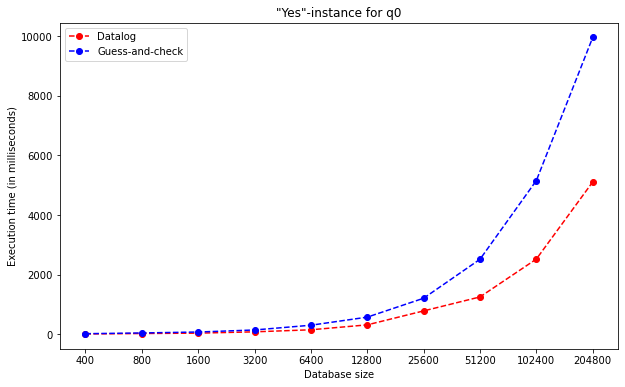

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x, mean_q0_datalog, marker='o', linestyle='--', color='r', label='Datalog') 
plt.plot(x, mean_q0_gac, marker='o', linestyle='--', color='b', label='Guess-and-check') 
plt.xlabel('Database size')
plt.ylabel('Execution time (in milliseconds)') 
plt.xticks(x, size_db)
plt.title('"Yes"-instance for q0')
plt.legend() 
plt.show()

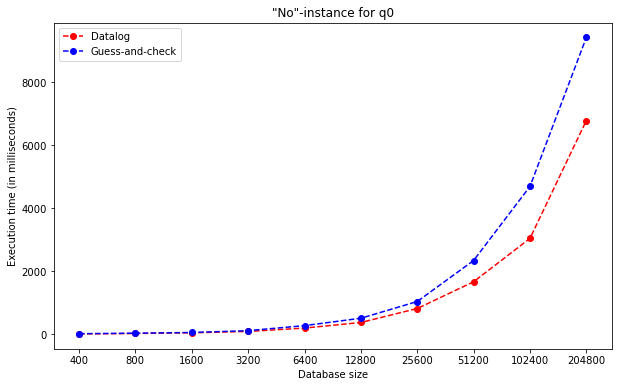

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x, mean_q0c_datalog, marker='o', linestyle='--', color='r', label='Datalog') 
plt.plot(x, mean_q0c_gac, marker='o', linestyle='--', color='b', label='Guess-and-check') 
plt.xlabel('Database size')
plt.ylabel('Execution time (in milliseconds)') 
plt.xticks(x, size_db)
plt.title('"No"-instance for q0')
plt.legend() 
plt.show()

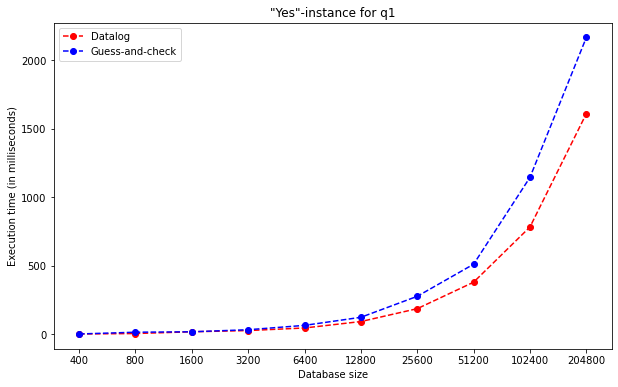

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x, mean_q1_datalog, marker='o', linestyle='--', color='r', label='Datalog') 
plt.plot(x, mean_q1_gac, marker='o', linestyle='--', color='b', label='Guess-and-check') 
plt.xlabel('Database size')
plt.ylabel('Execution time (in milliseconds)') 
plt.xticks(x, size_db)
plt.title('"Yes"-instance for q1')
plt.legend() 
plt.show()

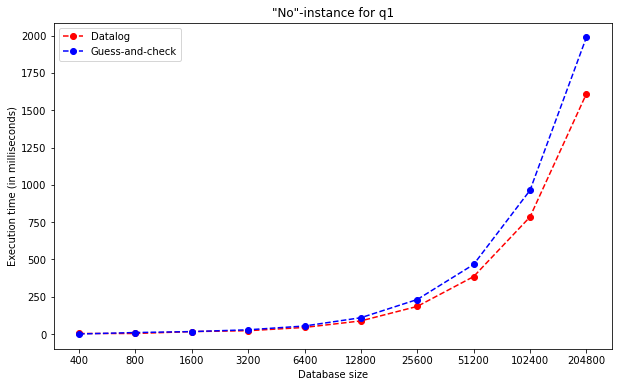

In [17]:
plt.figure(figsize=(10,6))
plt.plot(x, mean_q1c_datalog, marker='o', linestyle='--', color='r', label='Datalog') 
plt.plot(x, mean_q1c_gac, marker='o', linestyle='--', color='b', label='Guess-and-check') 
plt.xlabel('Database size')
plt.ylabel('Execution time (in milliseconds)') 
plt.xticks(x, size_db)
plt.title('"No"-instance for q1')
plt.legend() 
plt.show()